In [1]:
import os.path
from google.colab import files
if not os.path.isfile('mushrooms.csv'):
  uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [2]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df = df.rename(columns=
          {
            "cap-shape": "cap_shape", 
            "cap-surface": "cap_surface",
            "cap-color": "cap_color",
            "gill-attachment": "gill_attachment",
            "gill-spacing": "gill_spacing",
            "gill-size": "gill_size",
            "gill-color": "gill_color",
            "stalk-shape": "stalk_shape",
            "stalk-root": "stalk_root",
            "stalk-surface-above-ring": "stalk_surface_above_ring",
            "stalk-surface-below-ring": "stalk_surface_below_ring",
            "stalk-color-above-ring": "stalk_color_above_ring",
            "stalk-color-below-ring": "stalk_color_below_ring",
            "veil-type": "veil_type",
            "veil-color": "veil_color",
            "ring-number": "ring_number",
            "ring-type": "ring_type",
            "spore-print-color": "spore_print_color"
          })
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataKeys = [
    ['e', 'p'],
    ['b', 'c', 'x', 'f', 'k', 's'],
    ['f', 'g', 'y', 's'],
    ['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
    ['t', 'f'],
    ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
    ['a', 'd', 'f', 'n'],
    ['c', 'w', 'd'],
    ['b', 'n'],
    ['k', 'n', 'b', 'h', 'g', 'r', 'o', 'p', 'u', 'e', 'w', 'y'],
    ['e', 't'],
    ['b', 'c', 'u', 'e', 'z', 'r', '?'],
    ['f', 'y', 'k', 's'],
    ['f', 'y', 'k', 's'],
    ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
    ['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
    ['p', 'u'],
    ['n', 'o', 'w', 'y'],
    ['n', 'o', 't'],
    ['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
    ['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
    ['a', 'c', 'n', 's', 'v', 'y'],
    ['g', 'l', 'm', 'p', 'u', 'w', 'd']
]

def checkForIssuesInData(dataDict, df):
  arr = df.T.to_numpy()
  for n in range(len(arr)):
    col = arr[n]
    correctValues = dataDict[n]
    values, counts = np.unique(arr[n], return_counts=True)
    for v in correctValues:
        if not np.isin(v, values):
            print(df.columns[n] + ": value " + v + " is not present")
    for v in values:
        if not np.isin(v, correctValues):
            print(df.columns[n] + ": value " + v + " should not be present but is")

In [5]:
checkForIssuesInData(dataKeys, df)

gill_attachment: value d is not present
gill_attachment: value n is not present
gill_spacing: value d is not present
stalk_root: value u is not present
stalk_root: value z is not present
veil_type: value u is not present
ring_type: value c is not present
ring_type: value s is not present
ring_type: value z is not present


In [6]:
df_noVeilType = df.drop(['veil_type'], axis=1) #only have one value

df_noStalkRootRows = df_noVeilType.drop(df_noVeilType[df_noVeilType.stalk_root == '?'].index)

df_noStalkRoot = df_noVeilType.drop(['stalk_root'], axis=1)

df_removedAssociations = df_noStalkRoot.drop(['veil_color', 'stalk_color_below_ring', 'stalk_color_above_ring'], axis=1)

df_stalkRoot = df_noStalkRootRows['stalk_root']

def splitClassAndData(dataframe):
  c = dataframe['class']
  d = dataframe.drop(['class'], axis=1)
  return d, c

In [7]:
def P(data, columnName, value):
  if columnName in data.columns:
    if value in data[columnName].values:
      return data[columnName].value_counts()[value] / len(data[columnName])
    raise Exception(value + " not in " + columnName)
  raise Exception(columnName + "not in data.columns")

P(df_noStalkRoot, 'cap_color', 'n') * 100

28.114229443623827

In [8]:
import scipy.stats as ss

def getFreqTable(data, column1, column2):
  return pd.crosstab(data[column1], data[column2])
  #return data[[column1, column2]].value_counts().unstack().fillna(0)

def ChiSquare(data, column1, column2):
  return ss.chi2_contingency(getFreqTable(data, column1, column2).to_numpy().astype(int))

In [9]:
df_noStalkRoot[['class', 'gill_color']].value_counts().unstack().fillna(0)

gill_color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0.0,96.0,248.0,204.0,344.0,936.0,64.0,852.0,0.0,444.0,956.0,64.0
p,1728.0,0.0,504.0,528.0,64.0,112.0,0.0,640.0,24.0,48.0,246.0,22.0


In [10]:
df_noStalkRoot[['gill_attachment', 'veil_color']].value_counts().unstack().fillna(0)

veil_color,n,o,w,y
gill_attachment,,,,
a,96.0,96.0,18.0,0.0
f,0.0,0.0,7906.0,8.0


In [11]:
df_noStalkRoot[['class', 'odor']].value_counts().unstack().fillna(0)

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,400.0,0.0,0.0,400.0,0.0,3408.0,0.0,0.0,0.0
p,0.0,192.0,2160.0,0.0,36.0,120.0,256.0,576.0,576.0


In [12]:
ChiSquare(df_noStalkRoot, 'bruises', 'stalk_surface_above_ring')

(2687.7183341650334,
 0.0,
 3,
 array([[ 322.61152142, 1386.29443624, 3025.06745446,   14.02658789],
        [ 229.38847858,  985.70556376, 2150.93254554,    9.97341211]]))

In [13]:
def AllChiSquares(data):
  columns = data.columns
  array = []
  for i in columns:
    tempArr = []
    for j in columns:
      if i == j:
        tempArr.append(1)
      else:
        chi2, p, dof, ex = ChiSquare(data, i, j)
        tempArr.append(round(p, 4))
    array.append(tempArr)
  return array

In [14]:
pd.DataFrame(AllChiSquares(df_noStalkRoot), index=df_noStalkRoot.columns, columns=df_noStalkRoot.columns).head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
class,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cap_shape,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cap_surface,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cap_color,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bruises,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Corrected Cramers V from https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

#returns assoication on a scale from 1 to 0
#reference https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/#:~:text=Cramer's%20V%20is%20an%20alternative,1%20without%20any%20negative%20values.&text=However%2C%20a%20value%20bigger%20than,Cramer's%20V%20(Table%202).
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
  

In [16]:
def AllCramersV(data, headers=False):
  columns = data.columns
  array = []
  if headers: array.append(np.concatenate([[''],columns.values]))
  for i in columns:
    tempArr = []
    if headers: tempArr.append(i)
    for j in columns:
      if i == j:
        tempArr.append(1)
      else:
        v = cramers_corrected_stat(getFreqTable(data, i, j).to_numpy().astype(int))
        tempArr.append(v)
    array.append(tempArr)
  return array

In [17]:
temp1 = []

for i in df_noStalkRoot.columns.values:
  if i != 'class':
    temp1.append(cramers_corrected_stat(getFreqTable(df_noStalkRoot, 'class', i).to_numpy().astype(int)))

pd.DataFrame(pd.Series(temp1, index=df_noStalkRoot.columns[1:]).sort_values(ascending=False), columns=['Cramer\'s V'])

,Cramer's V
odor,0.970558
spore_print_color,0.752036
gill_color,0.679877
ring_type,0.602900
stalk_surface_above_ring,0.587666
stalk_surface_below_ring,0.574551
gill_size,0.539677
stalk_color_above_ring,0.523943
stalk_color_below_ring,0.513799
bruises,0.501188


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def generateHeatMap(data, cmap='viridis'):
  attributes = data.columns
  mask = np.triu(np.ones_like(data, dtype=bool))
  sns.set(font_scale=2)
  plt.figure(figsize=(15, 15))
  sns.heatmap(data, mask=mask, annot=True, cmap=cmap, alpha=1)

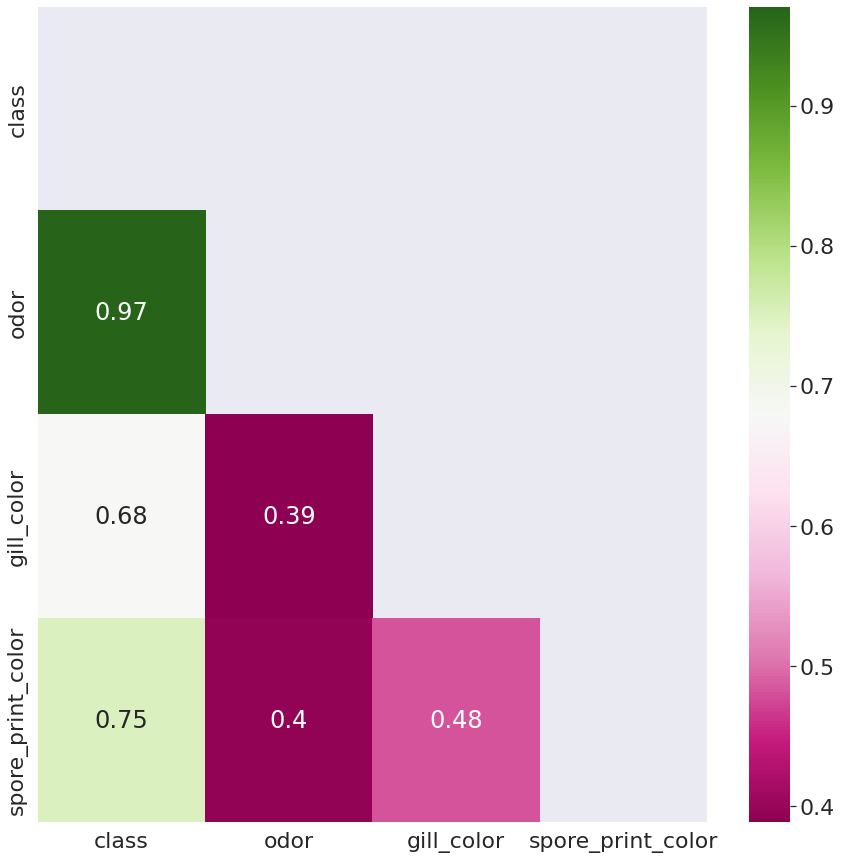

In [29]:
test1 = df_noStalkRoot[['class','odor','gill_color', 'spore_print_color']]
generateHeatMap(pd.DataFrame(AllCramersV(test1), index=test1.columns, columns=test1.columns ), cmap='PiYG')
#generateHeatMap(pd.DataFrame(AllCramersV(df_noStalkRoot), index=df_noStalkRoot.columns, columns=df_noStalkRoot.columns ), cmap='PiYG')
#plt.savefig("cramersV.png")
#files.download("cramersV.png")

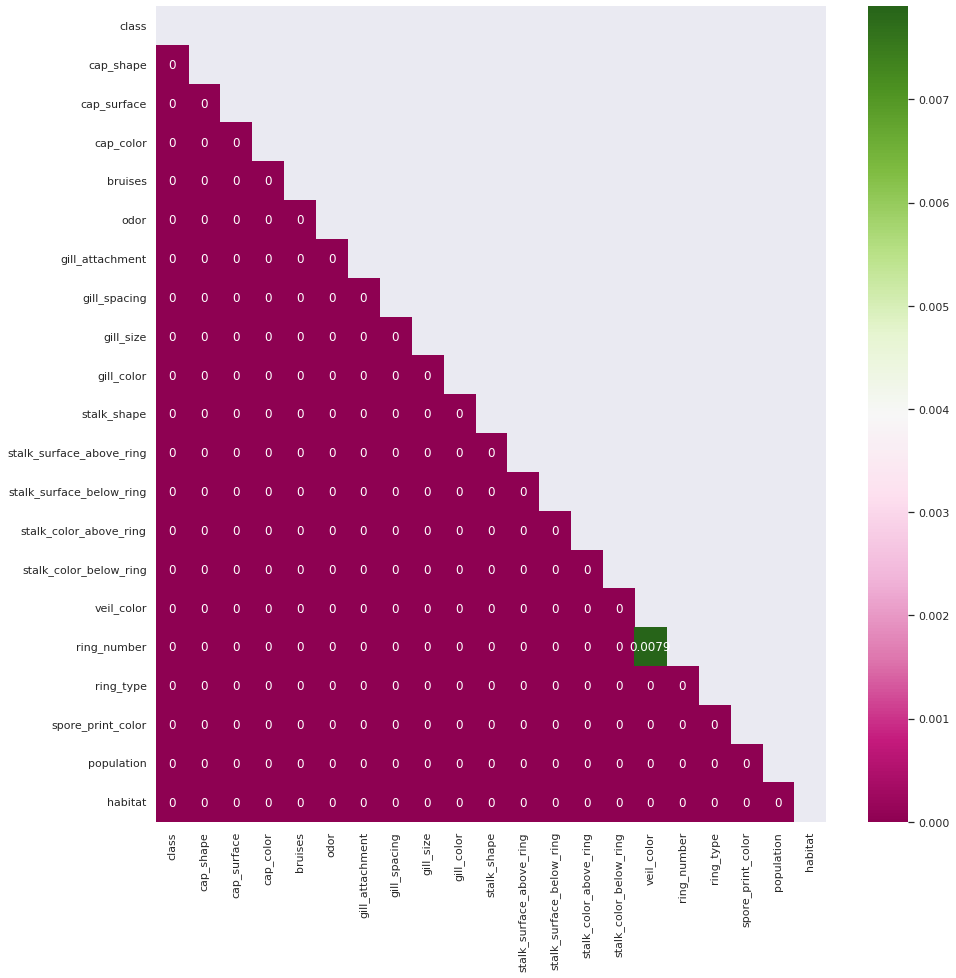

In [24]:
generateHeatMap(pd.DataFrame(AllChiSquares(df_noStalkRoot), index=df_noStalkRoot.columns, columns=df_noStalkRoot.columns), cmap='PiYG')

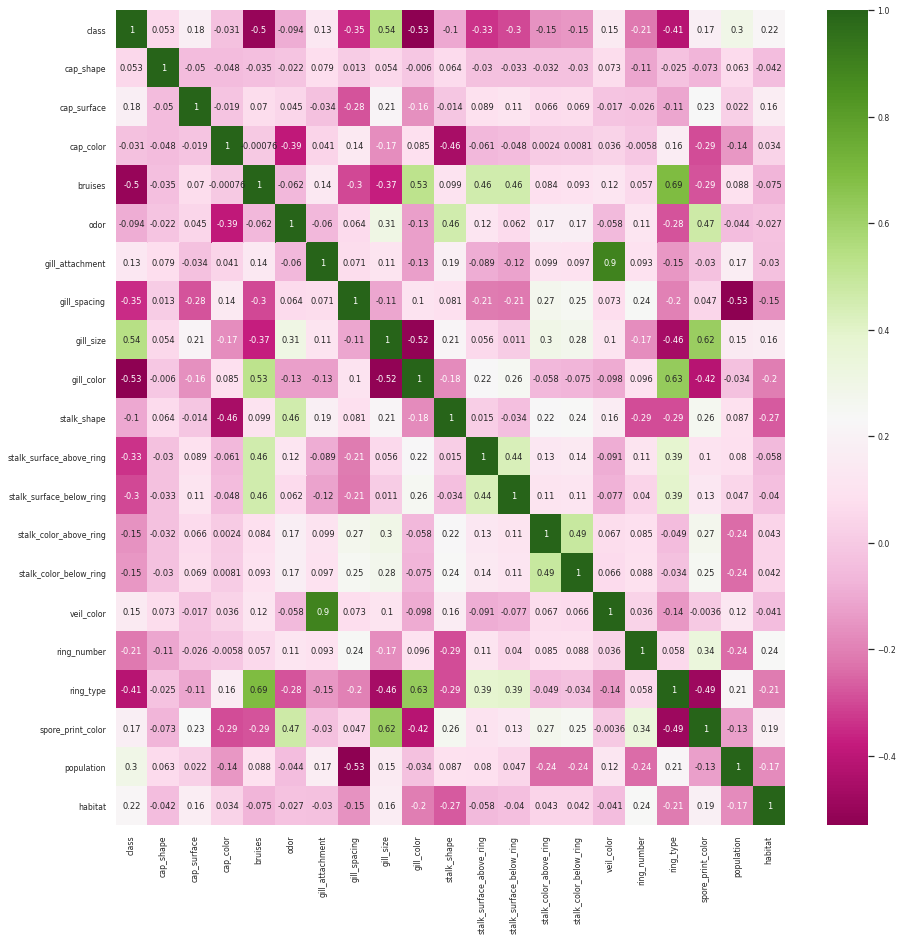

In [ ]:
test1, test2 = DataToNumbers(df_noStalkRoot, df_noStalkRoot['class'], oneHot=False)
plt.figure(figsize=(15, 15))
sns.set(font_scale=0.7)
sns.heatmap(test1.corr(), annot=True, cmap='PiYG')

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
import sklearn.metrics

def bayesClassifierFit(trainingData, Answers):
  clf = CategoricalNB()
  return clf.fit(trainingData.to_numpy(), Answers.to_numpy())

def splitShuffleData(Data, Answers):
  #seed = np.random.randint(0, 1000)
  seed = 0
  #print(seed)
  test_data, training_data = train_test_split(Data, shuffle = True, random_state = seed, test_size=0.7)
  test_answers, training_answers = train_test_split(Answers, shuffle = True, random_state = seed, test_size=0.7)

    #print(len(test_data))
  #print(len(training_data))
  #print(len(test_answers))
  #print(len(training_answers))

  return training_data.reset_index(drop=True), training_answers.reset_index(drop=True), test_data.reset_index(drop=True), test_answers.reset_index(drop=True)

def DataToNumbers(Data, Answers, oneHot=True):
  st = []
  for s in Data.columns.values:
    st.append(s)
  if oneHot:
    formattedData = pd.get_dummies(Data, columns=st, prefix=st)
  else:
    formattedData = pd.DataFrame({col: Data[col].astype('category').cat.codes for col in Data}, index=Data.index)
  
  formattedAnswers = Answers.astype('category').cat.codes

  #print(Answers)
  #print(formattedAnswers)
  return formattedData, formattedAnswers

def getPredictedAnswers(trainedClf, testData):
  return trainedClf.predict(testData)

def getScoreConfusionMatrix(trainedClf, testData, testAnswers):
  predictedAnswers = getPredictedAnswers(trainedClf, testData)
  return confusion_matrix(testAnswers, predictedAnswers)

def ScoreClassifier(trainedClf, testData, testAnswers):
  matrix = getScoreConfusionMatrix(trainedClf, testData, testAnswers)
  tn, fp, fn, tp = matrix.ravel()
  TN = float(tn)
  FP = float(fp)
  FN = float(fn)
  TP = float(tp)
  accuracy = (( TP + TN ) / (TP + TN + FP + FN)) * 100
  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  FNR = FN / (FN + TP)
  precision = TP / (TP + FP)
  return matrix, round(accuracy, 2), round(TPR,2), round(FPR,2), round(FNR,2), round(precision, 2)

def executeNaieveBayesClassifier(dataframe):
  d, a = splitClassAndData(dataframe)
  data, answers = DataToNumbers(d, a, oneHot=False)
  trainingData, trainingAnswers, testData, testAnswers = splitShuffleData(data, answers)
  clf = bayesClassifierFit(trainingData, trainingAnswers)
  sklearn.metrics.plot_roc_curve(clf, testData, testAnswers)
  return ScoreClassifier(clf, testData, testAnswers)

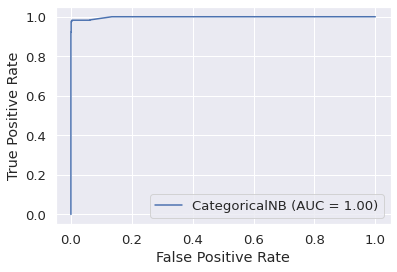

In [ ]:
def temp(dataframe):
  d, a = splitClassAndData(dataframe)
  data, answers = DataToNumbers(d, a, oneHot=False)
  trainingData, trainingAnswers, testData, testAnswers = splitShuffleData(data, answers)
  clf = bayesClassifierFit(trainingData, trainingAnswers)
  sklearn.metrics.plot_roc_curve(clf, testData, testAnswers)

temp(df_noStalkRoot[['class','odor','gill_color', 'spore_print_color']])

In [ ]:
def finalTrain(dataset):
  seed = 3
  d1 = dataset.sample(frac = 0.3333333, random_state=seed)
  d2 = dataset.drop(d1.index).sample(frac = 0.5, random_state=seed)
  d3 = dataset.drop(d1.index).drop(d2.index).sample(frac = 1, random_state=seed)
  r1 = [executeNaieveBayesClassifier(d1)]
  r2 = [executeNaieveBayesClassifier(d2)]
  r3 = [executeNaieveBayesClassifier(d3)]
  combined = [r1[0][1:],r2[0][1:],r3[0][1:]]
  print('run 1:')
  print(pd.DataFrame(r1[0][0], index=['Te', 'Tp'], columns=['Pe', 'Pp']))
  print('\nrun 2:')
  print(pd.DataFrame(r2[0][0], index=['Te', 'Tp'], columns=['Pe', 'Pp']))
  print('\nrun 3:')
  print(pd.DataFrame(r3[0][0], index=['Te', 'Tp'], columns=['Pe', 'Pp']))
  df_combined = pd.DataFrame(combined, columns=['Accuracy', 'TPR', 'FPR', 'FNR', 'precision'])

  

  return df_combined


run 1:
     Pe   Pp
Te  419    1
Tp   29  363

run 2:
     Pe   Pp
Te  422    2
Tp   11  377

run 3:
     Pe   Pp
Te  414    0
Tp    7  391


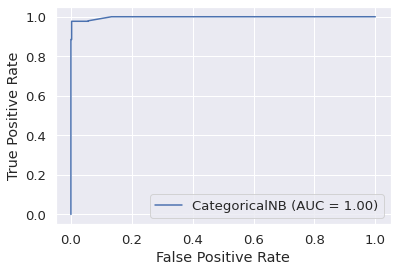

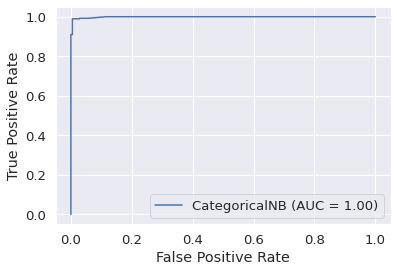

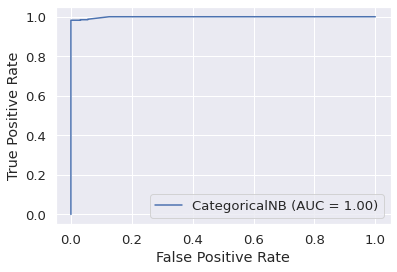

In [ ]:
#print(executeNaieveBayesClassifier(df_noStalkRoot[['class','bruises','odor','gill_size','gill_color','stalk_surface_above_ring', 'stalk_surface_below_ring', 'ring_type', 'spore_print_color']])[0])
#print(executeNaieveBayesClassifier(df_noStalkRoot[['class','odor']])[0])
#print(executeNaieveBayesClassifier(df_removedAssociations)[0])
#executeNaieveBayesClassifier(df_noStalkRoot[['class','odor','gill_color', 'spore_print_color']])

test1 = finalTrain(df_noStalkRoot[['class','odor','gill_color', 'spore_print_color']])

In [ ]:
test1

,Accuracy,TPR,FPR,FNR,precision
0,96.31,0.93,0.0024,0.07,1.00
1,98.40,0.97,0.0047,0.03,0.99
2,99.14,0.98,0.0000,0.02,1.00
